<img style="float: right;" width="120" src="../Images/supplier-logo.png">
<img style="float: left; margin-top: 0" width="80" src="../Images/client-logo.png">
<br><br><br>


# Calculate the Bollinger Band for

> the month moving average of the Closing price for AAPL

## Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data into a DataFrame


In [2]:
df = pd.read_excel(io='../Data/market_data.xls',
                   sheet_name='AAPL',
                   index_col='Date', 
                   parse_dates=True)

## Check what has been imported into the DataFrame
- Have a quick look at what we have read in
- No right or wrong way to do this
- Depends on your style, personal preferences, type of data being read in etc
- A few examples
> `df.tail()`
`df.head()`
`df.describe()`
    
**IMPORTANT**<br>
>When working with DataFrames that have Dates as an index, make sure the date values are sorted in an ascending manner

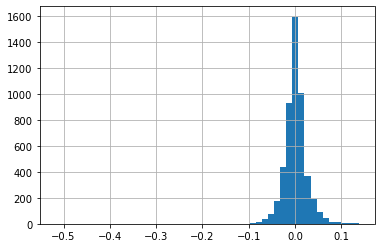

In [3]:
df['Close'].pct_change().hist(bins=50)

## Calculate the Bollinger Bands for the Adj. Close

- **Middle Band** = Monthly moving average <br>
- **Upper Band** = Monthly moving average + (Monthly standard deviation of price x 2) 
- **Lower Band** = Monthly moving average - (Monthly standard deviation of price x 2)

In [4]:
# 21 days is a good approximation of a single month
df['30d mavg'] = df['Close'].rolling(window=21).mean()
df['30d std'] = df['Close'].rolling(window=21).std()
df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)

## Plot the results

Use the matplot lib defaults

A plot of the entire series of values

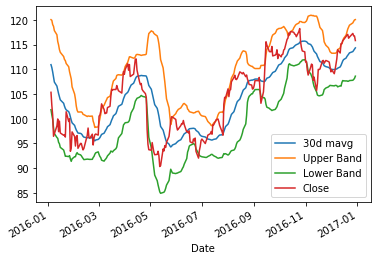

In [5]:
# create a list of the column names we are interested in plotting

cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df[cols]['2016'].plot()

## Plot the results 

> of all data from the start of 2016 to the end of the series

Here use Slice from '2016 to the end

# Improve the presentation of the chart

Here I am 
- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

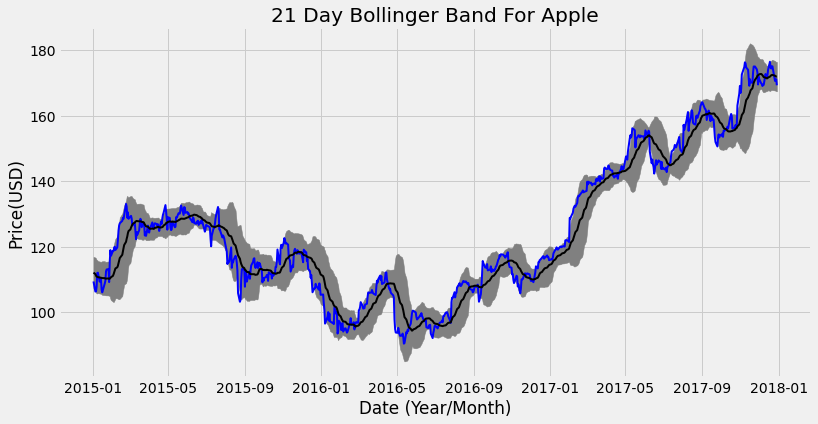

In [6]:
# create some variables
col = 'Close'
start = '2015'
end = '2017'
filename = "../Data/market_data.xls"
secname = 'Apple'
win = 21

# read csv file into a dataframe
df = pd.read_excel(io=filename,
                   sheet_name='AAPL',
                   index_col='Date',
                   parse_dates=True)

# create a new dataframe to store the data for the Bollinger Band
df_Boll = pd.DataFrame()
df_Boll[col] = df[col]
df_Boll['M avg'] = df_Boll[col].rolling(window=win).mean()
df_Boll['Upper'] = df_Boll['M avg'] + (2 * df[col].rolling(window=win).std())
df_Boll['Lower'] = df_Boll['M avg'] - (2 * df[col].rolling(window=win).std())

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll[start:end].index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll[start:end]['Upper'], 
                df_Boll[start:end]['Lower'], 
                color='grey')

ax.plot(x_axis, df_Boll[start:end][col], color='blue', lw=2)
ax.plot(x_axis, df_Boll[start:end]['M avg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title(str(win) + ' Day Bollinger Band For ' + secname)
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();


# Make your code more resuable by converting it to a function

Here I am 
- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

In [ ]:
def plotBollBand(filename, secname, col = 'Close', win = 21, start=None, end=None):
    # read csv file into a dataframe
    df = pd.read_excel(io=filename,
                       sheet_name=secname,
                       index_col='Date',
                       parse_dates=True)

    # create a new dataframe to store the data for the Bollinger Band
    df_Boll = pd.DataFrame()
    df_Boll[col] = df[col]
    df_Boll['M avg'] = df_Boll[col].rolling(window=win).mean()
    df_Boll['Upper'] = df_Boll['M avg'] + (2 * df[col].rolling(window=win).std())
    df_Boll['Lower'] = df_Boll['M avg'] - (2 * df[col].rolling(window=win).std())

    # set style, empty figure and axes
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    # Get index values for the X axis for the DataFrame
    x_axis = df_Boll[start:end].index.get_level_values(0)

    # Plot shaded 'win' Day Bollinger Band for Facebook
    ax.fill_between(x_axis, 
                    df_Boll[start:end]['Upper'], 
                    df_Boll[start:end]['Lower'], 
                    color='grey')

    ax.plot(x_axis, df_Boll[start:end][col], color='blue', lw=2)
    ax.plot(x_axis, df_Boll[start:end]['M avg'], color='black', lw=2)

    # Set Title & Show the Image
    ax.set_title(str(win) + ' Day Bollinger Band For ' + secname)
    ax.set_xlabel('Date (Year/Month)')
    ax.set_ylabel('Price(USD)')

    plt.show();


## Test with Google

For example use the data for google but leave all other inputs as default

In [ ]:
plotBollBand(filename='../Data/market_data.xls', secname='GOOGL')

## Test with EURO Price of Silver

For example use the data for SILVER but only for the period 2014 to 2016

In [ ]:
plotBollBand(filename='../Data/commodities.xlsx', 
             secname='SILVER', 
             start='2014', 
             end = '2016',
             col = 'EURO')

## Test with JPM

For example use the data for JPM but with the following parameters
- start 2014
- end - default
- a 42 day rolling average
- use the Volumne column

In [ ]:
plotBollBand(filename='../Data/market_data.xls', 
             secname='JPM', 
             start='2014', 
             win=42,
             col = 'Volume')

# triple witching